# Heat equation

The heat equation is a fundamental partial differential equation that describes the evolution of temperature distribution over time in a given domain. In this tutorial, we will perform a 1D transient analysis of the heat equation.

The 1D heat equation is given by:

$$
\frac{\partial u}{\partial t} = k \frac{\partial^2 u}{\partial x^2} + f(x, t),
$$

where $u(x, t)$ is the temperature distribution at position $x$ and time $t$, $k$ is the thermal conductivity, and $f(x, t)$ represents any source term in the equation. For this analysis, we consider a 1D domain $[0, L]$.

https://fenicsproject.org/pub/tutorial/html/._ftut1006.html


In [247]:
from fenics import *

# Create a mesh
L = 1.0  # Length of the domain
nx = 100  # Number of spatial nodes
mesh = IntervalMesh(nx, 0, L)

# Define the function space
degree = 1  # Linear elements
S = FunctionSpace(mesh, 'CG', degree)

## Initial Condition and Boundary Conditions

We specify an initial temperature distribution $u_{\text{initial}}(x)$ at $t = 0$. For this analysis, we use the expression $u_{\text{initial}}(x) = \exp(-100(x - 0.5)^2)$. Additionally, we need to impose boundary conditions to complete the problem formulation.


In [248]:
# Define initial condition and boundary conditions
u_initial = Expression('20*sin(pi*x[0])', degree=2, domain=mesh)
u_n = interpolate(u_initial, S)
u_n_minus_1 = Function(S)

## Temporal Discretization

We define the total simulation time $T$ and the number of time steps $num\_steps$. The time step size $dt$ is calculated as $dt = \frac{T}{num\_steps}$.


In [249]:

# Define time discretization parameters
T = 1.0   # Total simulation time
num_steps = 5  # Number of time steps
dt = T / num_steps  # Time step size

# Define the heat equation
u = TrialFunction(S)
v = TestFunction(S)
k = Constant(1.0e-1)  # Thermal conductivity
f = Constant(0.0)  # Source term (zero for this example)

In [250]:
support = CompiledSubDomain("on_boundary")
bc = DirichletBC(S, Constant(0), support)
# bc = []

In [251]:
a = u*v*dx + dt*k*inner(grad(u), grad(v))*dx
L = (u_n*v*dx + dt*f*v*dx)

## Time-stepping Loop

We use a time-stepping loop to iteratively solve the heat equation at each time step. At every time step, we update the temperature distribution based on the discretized equation.


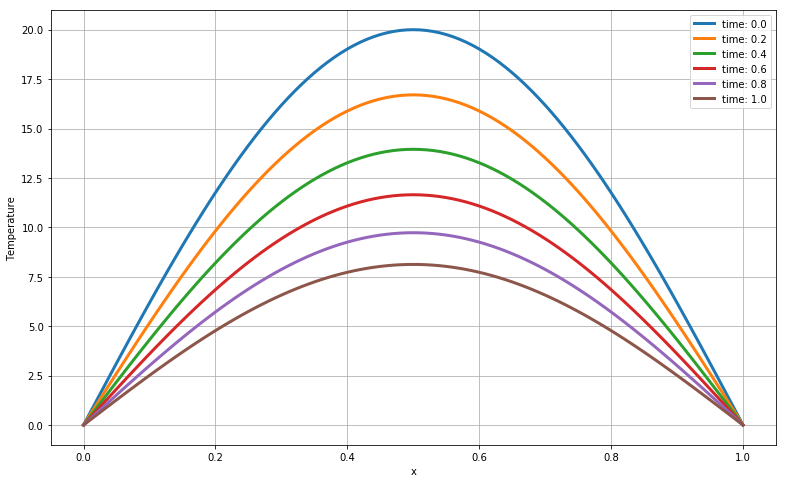

In [252]:
u = Function(S)
t = 0
# Create a figure with the specified size
fig, ax = plt.subplots(figsize=(13, 8))
label = 'time: {0:3.1f}'.format(t)  # Label for each curve
ax.plot(mesh.coordinates(), u_n.vector()[:], label=label, linewidth=3)

for n in range(num_steps):
    t += dt
    solve(a == L, u, bc)

    # Update solution for the next time step
    u_n_minus_1.assign(u_n)
    u_n.assign(u)

    label = 'time: {0:3.1f}'.format(t)  # Label for each curve
    ax.plot(mesh.coordinates(), u.vector()[:], label=label, linewidth=3)

# Add labels and legend
ax.set_xlabel('x')
ax.set_ylabel('Temperature')
ax.legend()

# Show the plot
ax.grid(True)
plt.show()